In [1]:
import datetime
from db import DB
db = DB()

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('fivethirtyeight') # fivethirtyeight, fast
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # font to handle chinese
%matplotlib inline

In [2]:
import prep_download
import prep_parse

from_date = datetime.date(2020,8,1)

prep_download.download_daily(db, from_date)
prep_parse.parse_daily(db, from_date)

# prep_download.download_weekly(db, from_date)
# prep_parse.parse_weekly(db, from_date)

# prep_download.download_monthly(from_date)
# prep_parse.parse_monthly(db, from_date)

## https://mops.twse.com.tw/server-java/FileDownLoad?step=9&fileName=tifrs-2019Q3.zip&filePath=/home/html/nas/ifrs/2019/
# prep_download.download_quarterly(db, from_date)
# prep_parse.parse_quarterly(db, from_date)

download_daily_foreign_buy_sell_surplus 2020-08-03
download_daily_foreign_hold_ratio 2020-08-03
download_daily_foreign_buy_sell_surplus 2020-08-04
download_daily_foreign_hold_ratio 2020-08-04
download_daily_foreign_buy_sell_surplus 2020-08-05
download_daily_foreign_hold_ratio 2020-08-05
parse_daily_foreign_buy_sell_surplus 2020-08-03
parse_daily_foreign_hold_ratio 2020-08-03
parse_daily_foreign_buy_sell_surplus 2020-08-04
parse_daily_foreign_hold_ratio 2020-08-04
parse_daily_foreign_buy_sell_surplus 2020-08-05
parse_daily_foreign_hold_ratio 2020-08-05


c:\users\mervin\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\mervin\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


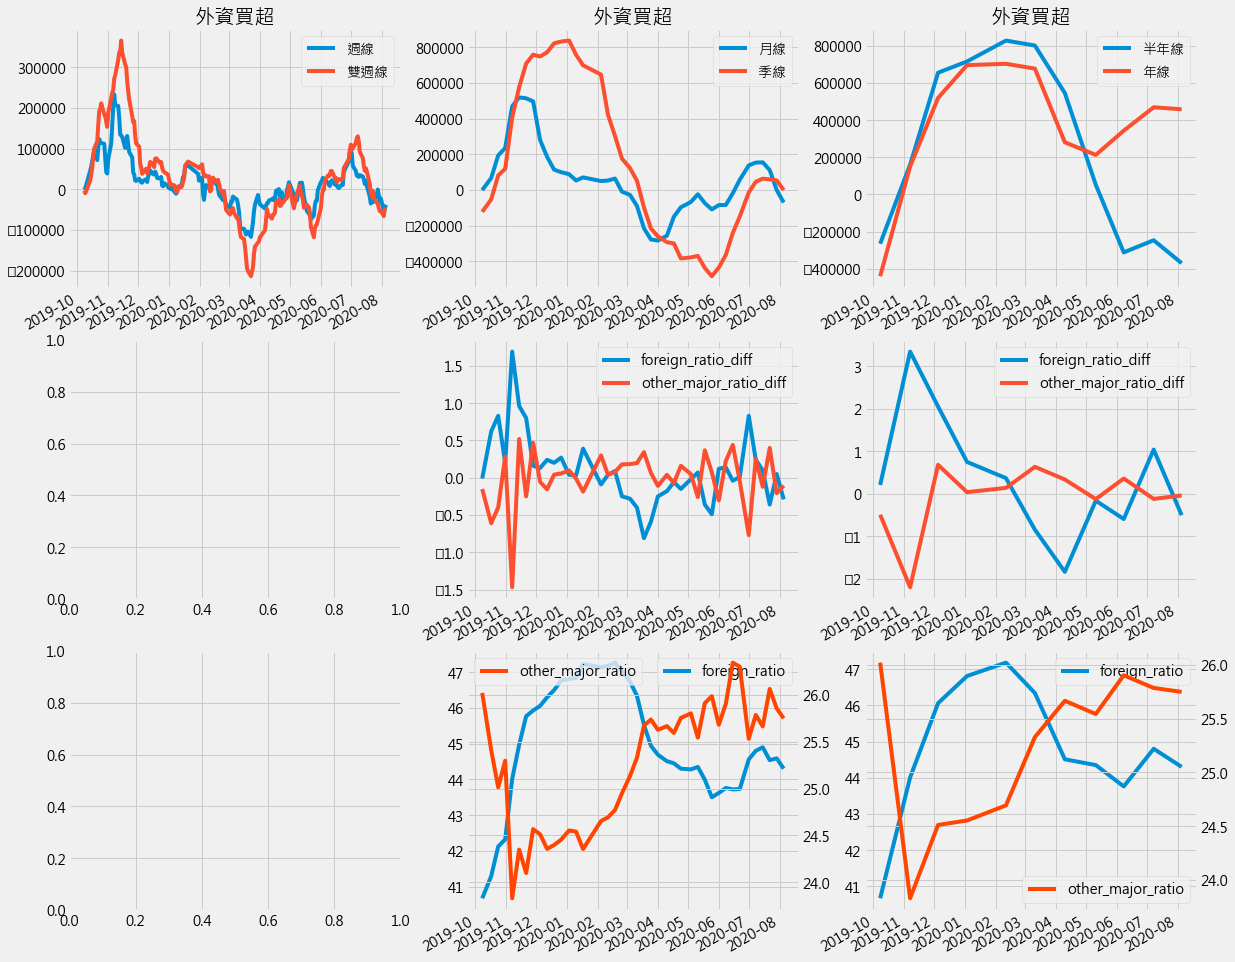

In [4]:
from analysis_fundamental import dashboard as fundamental
from analysis_technical import dashboard as technical
from analysis_chip import dashboard as chip

stock_id = '2317'
# technical(stock_id, db)
chip(stock_id, db, 20, datetime.date(2019,10,8))
# chip(stock_id, db, 20)
# fundamental(stock_id, db)

In [5]:
import strategy
stock_info = db.get_stock_info()[['stock_name', 'industry']]
stock_data = strategy.prepare_stock_data(db)

In [6]:
def print_result(df):
    df[['股價低', '本益比低', '本淨比低', '眼光費低']] = df[['股價低', '本益比低', '本淨比低', '眼光費低']].applymap(lambda x: "{:.2%}".format(x))
    display(df)
    
date = datetime.date(2020,8,5) # modify

df = strategy.get_stock_data_by_date(stock_info, stock_data, date)

df1 = df[ (df['EPS4季'] > 1) & (df['本益比'] < 10) & (df['眼光費'] < 1) ].copy() # modify
print_result(df1)

df2 = df[ ((df['本益比低'] < 0.4) & (df['本淨比低'] < 0.4)) & (df['close'] < 100)].copy() # modify
print_result(df2)

print_result(df[df['stock_name'] == '鴻海'].copy())

,stock_name,industry,close,淨值/股,EPS4季,本益比,本淨比,眼光費,外資買超,股價低,本益比低,本淨比低,眼光費低
9904,寶成,其他,27.65,34.32,3.42,8.08,0.81,-1.95,-552,28.19%,40.05%,20.45%,20.55%
1102,亞泥,水泥工業,40.85,42.30,4.87,8.39,0.97,-0.30,-6487,80.57%,4.89%,75.79%,93.11%
4938,和碩,電腦及週邊設備業,63.4,56.63,7.48,8.48,1.12,0.91,-1756,67.62%,33.64%,58.41%,65.86%


,stock_name,industry,close,淨值/股,EPS4季,本益比,本淨比,眼光費,外資買超,股價低,本益比低,本淨比低,眼光費低
6505,台塑化,油電燃氣業,81.1,31.43,1.84,44.08,2.58,27.00,-153,35.10%,8.30%,34.29%,8.46%
1402,遠東新,紡織纖維,26.1,38.12,2.05,12.73,0.68,-5.86,-2342,52.62%,22.35%,34.40%,65.88%
1227,佳格,食品工業,62.2,18.76,3.56,17.47,3.32,12.20,-227,74.94%,21.86%,34.51%,23.71%


,stock_name,industry,close,淨值/股,EPS4季,本益比,本淨比,眼光費,外資買超,股價低,本益比低,本淨比低,眼光費低
2317,鴻海,其他電子業,77.9,87.44,7.04,11.07,0.89,-1.36,-3732,22.98%,46.52%,13.29%,17.33%
